In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
from scipy.stats import kendalltau

In [3]:
ruta = "/content/drive/MyDrive/proyecto python/consolidado.xlsx"

In [4]:
df = pd.read_excel(ruta)

In [5]:
df

,ano,presion(kPa),poblacion,temperaturaF
0,1995,86.077668,276127.00,27.6850
1,1996,86.067820,280853.50,26.5350
2,1997,86.055905,285314.50,28.6200
3,1998,86.085965,289475.00,29.0000
4,1999,86.088001,293352.75,26.4200
5,2000,86.083151,297000.50,26.6700
6,2001,86.090738,300471.75,28.3400
7,2002,86.106569,303859.25,28.0750
8,2003,86.086438,307191.00,29.0700
9,2004,86.111109,310526.25,27.9900


In [6]:
df.columns.values

array(['ano', 'presion(kPa)', 'poblacion', 'temperaturaF'], dtype=object)

In [7]:
df

,ano,presion(kPa),poblacion,temperaturaF
0,1995,86.077668,276127.00,27.6850
1,1996,86.067820,280853.50,26.5350
2,1997,86.055905,285314.50,28.6200
3,1998,86.085965,289475.00,29.0000
4,1999,86.088001,293352.75,26.4200
5,2000,86.083151,297000.50,26.6700
6,2001,86.090738,300471.75,28.3400
7,2002,86.106569,303859.25,28.0750
8,2003,86.086438,307191.00,29.0700
9,2004,86.111109,310526.25,27.9900


# Normalización

In [8]:
# Normaliza solo las columnas 'presion(kPa)', 'poblacion' y 'temperaturaF' usando Min-Max
min_max_scaler = MinMaxScaler()
df[['presion(kPa)', 'poblacion', 'temperaturaF']] = min_max_scaler.fit_transform(df[['presion(kPa)', 'poblacion', 'temperaturaF']])

# 'ano' no se modifica y se mantiene sin cambios.

# df ahora contendrá 'presion(kPa)', 'poblacion' y 'temperaturaF' normalizadas, mientras que 'ano' se mantendrá sin cambios.

In [9]:
df.rename(columns={'presion(kPa)': 'presion_norm',
                   'temperaturaF':'temperatura_norm',
                   'poblacion':'poblacion_norm'
                   }, inplace=True)

In [10]:
df

,ano,presion_norm,poblacion_norm,temperatura_norm
0,1995,0.414257,0.000000,0.379310
1,1996,0.241754,0.060778,0.034483
2,1997,0.033048,0.118143,0.659670
3,1998,0.559584,0.171643,0.773613
4,1999,0.595239,0.221507,0.000000
5,2000,0.510301,0.268414,0.074963
6,2001,0.643182,0.313051,0.575712
7,2002,0.920473,0.356612,0.496252
8,2003,0.567862,0.399455,0.794603
9,2004,1.000000,0.442343,0.470765


# Ajuste de curva de Temperatura

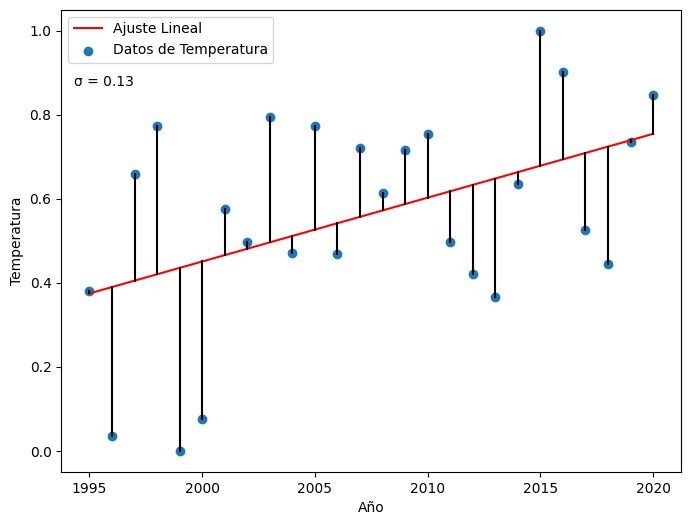

In [11]:
def linear_fit(x, a, b):
    return a * x + b

# Ajuste de la temperatura en función del año
x = df['ano']
y = df['temperatura_norm']

params, covariance = curve_fit(linear_fit, x, y)

a, b = params
y_fit = linear_fit(x, a, b)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualización del ajuste con barras de error
plt.figure(figsize=(8, 6))
plt.plot(x, y_fit, color='red', label='Ajuste Lineal')
plt.scatter(x, y, label='Datos de Temperatura')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()


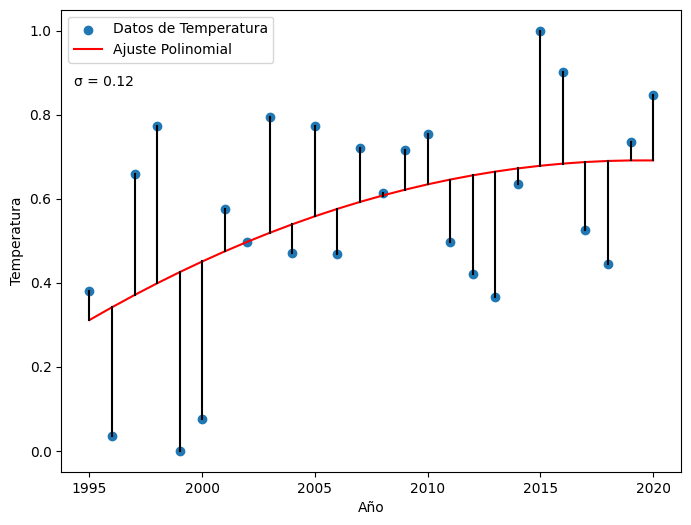

In [12]:
def polynomial_fit(x, a, b, c):
    return a * x**2 + b * x + c

params, covariance = curve_fit(polynomial_fit, x, y)

a, b, c = params
y_fit = polynomial_fit(x, a, b, c)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Temperatura')
plt.plot(x, y_fit, color='red', label='Ajuste Polinomial')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


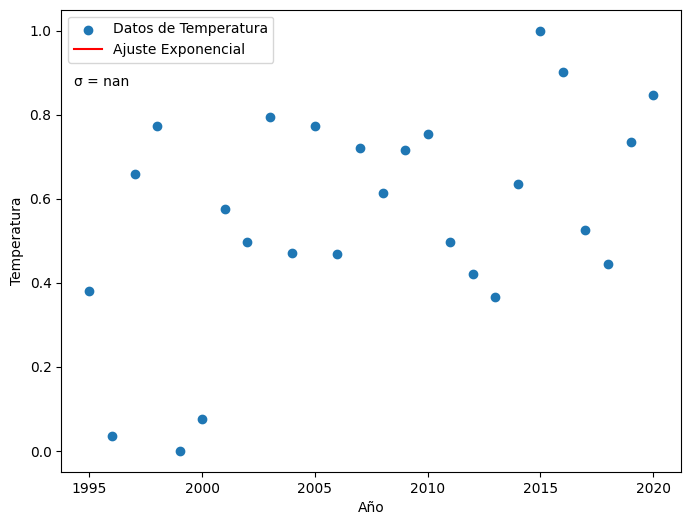

In [13]:
def exponential_fit(x, a, b, c):
    return a * np.exp(b*x)+c

params, covariance = curve_fit(exponential_fit, x, y)

a, b, c = params
y_fit = exponential_fit(x, a, b, c)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Temperatura')
plt.plot(x, y_fit, color='red', label='Ajuste Exponencial')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

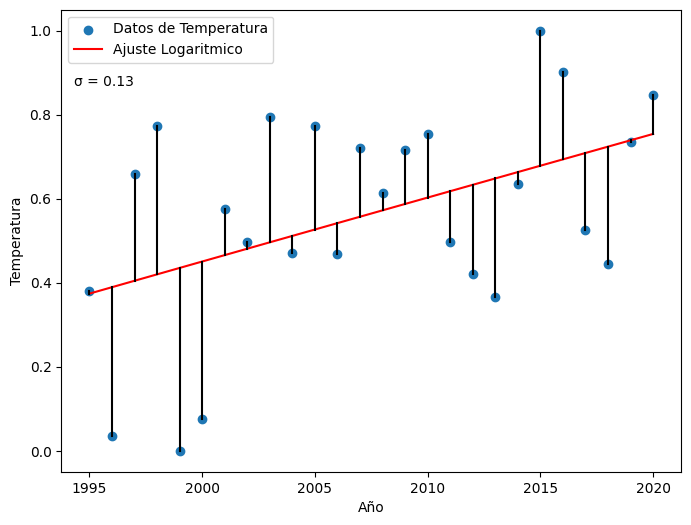

In [14]:
def logarithmic_fit(x, a, b):
    return a * np.log(x)+b

params, covariance = curve_fit(logarithmic_fit, x, y)

a, b= params
y_fit = logarithmic_fit(x, a, b)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Temperatura')
plt.plot(x, y_fit, color='red', label='Ajuste Logaritmico')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

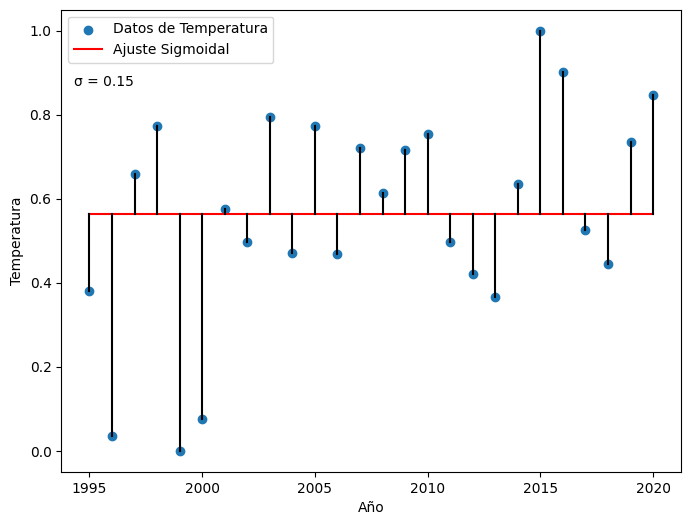

In [15]:
def sigmoid_fit(x, a, b, c, d):
    return a / ( 1 + np.exp(-b * (x - c)) ) + d

x = df['ano']
y = df['temperatura_norm']

params, covariance = curve_fit(sigmoid_fit, x, y)

a, b, c, d= params
y_fit = sigmoid_fit(x, a, b, c, d)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Temperatura')
plt.plot(x, y_fit, color='red', label='Ajuste Sigmoidal')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

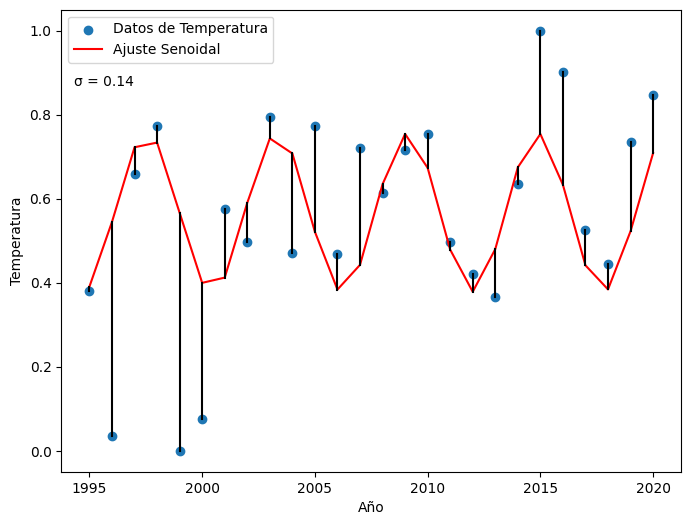

In [16]:
def sinosoidal_fit(x, A, omega, phi, offset):
    return A * np.sin(omega*x + phi) + offset

params, covariance = curve_fit(sinosoidal_fit, x, y)

A, omega, phi, offset= params
y_fit = sinosoidal_fit(x, A, omega, phi, offset)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Temperatura')
plt.plot(x, y_fit, color='red', label='Ajuste Senoidal')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.legend()
plt.show()

# Ajuste de curva de Población

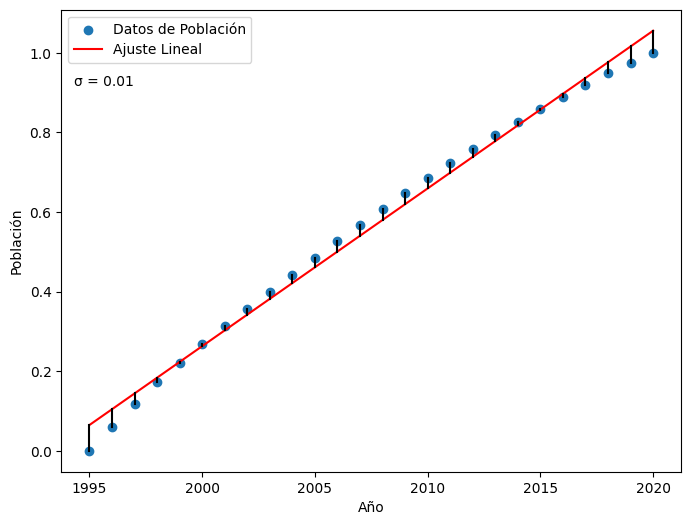

In [17]:
def linear_fit(x, a, b):
    return a * x + b

# Ajuste de la temperatura en función del año
x = df['ano']
y = df['poblacion_norm']

params, covariance = curve_fit(linear_fit, x, y)

a, b = params
y_fit = linear_fit(x, a, b)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_fit, color='red', label='Ajuste Lineal')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.show()

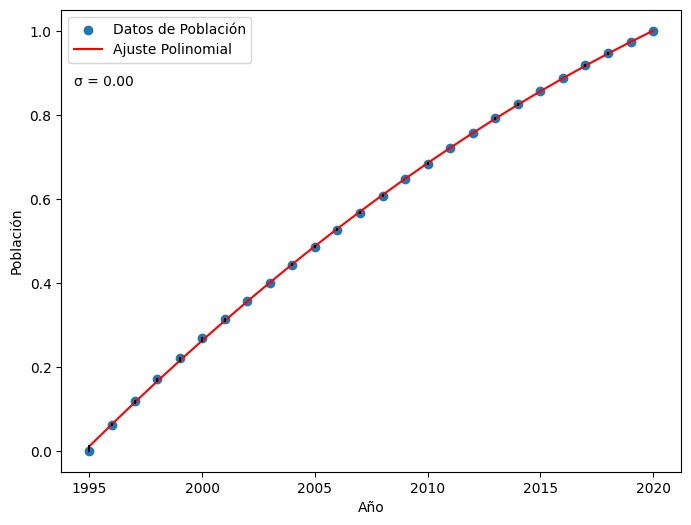

In [18]:
def polynomial_fit(x, a, b, c):
    return a * x**2 + b * x + c

params, covariance = curve_fit(polynomial_fit, x, y)

a, b, c = params
y_fit = polynomial_fit(x, a, b, c)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_fit, color='red', label='Ajuste Polinomial')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.show()

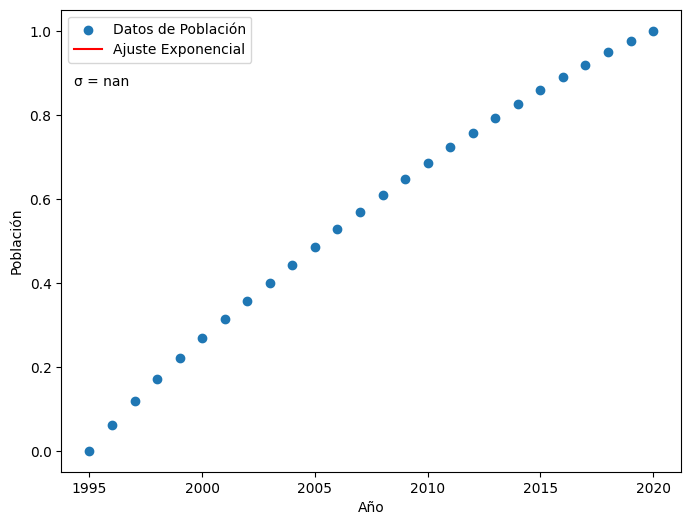

In [19]:
def exponential_fit(x, a, b, c):
    return a * np.exp(b*x)+c

params, covariance = curve_fit(exponential_fit, x, y)

a, b, c = params
y_fit = exponential_fit(x, a, b, c)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_fit, color='red', label='Ajuste Exponencial')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.show()

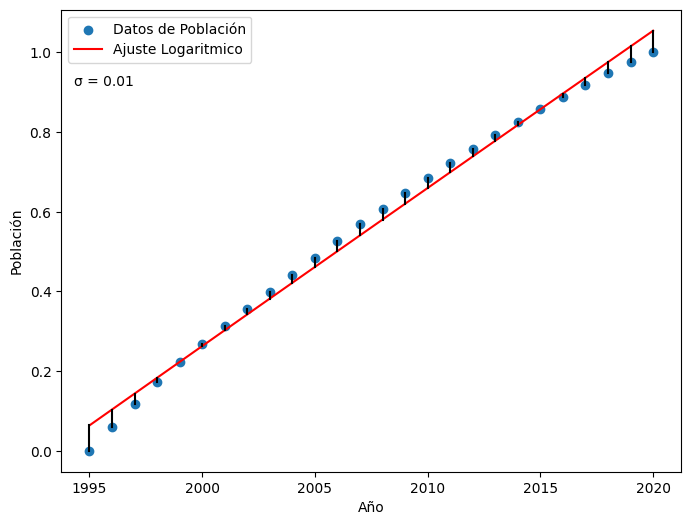

In [20]:
def logarithmic_fit(x, a, b):
    return a * np.log(x)+b

params, covariance = curve_fit(logarithmic_fit, x, y)

a, b= params
y_fit = logarithmic_fit(x, a, b)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_fit, color='red', label='Ajuste Logaritmico')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.show()

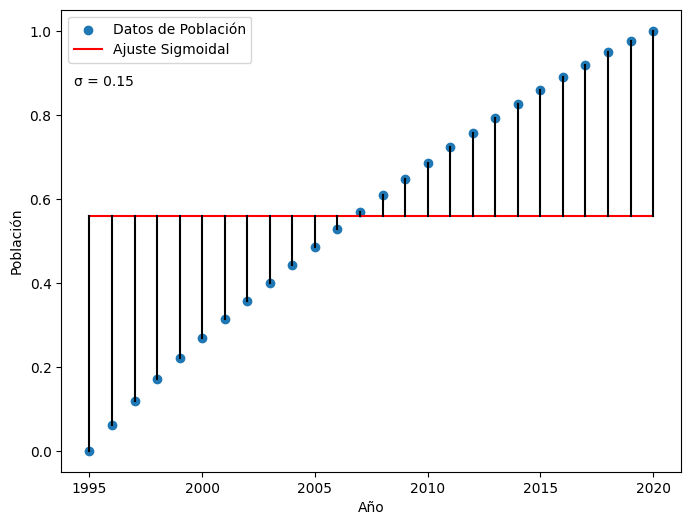

In [21]:
def sigmoid_fit(x, a, b, c, d):
    return a / ( 1 + np.exp(-b * (x - c)) ) + d

params, covariance = curve_fit(sigmoid_fit, x, y)

a, b, c, d= params
y_fit = sigmoid_fit(x, a, b, c, d)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)


# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_fit, color='red', label='Ajuste Sigmoidal')


# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.show()

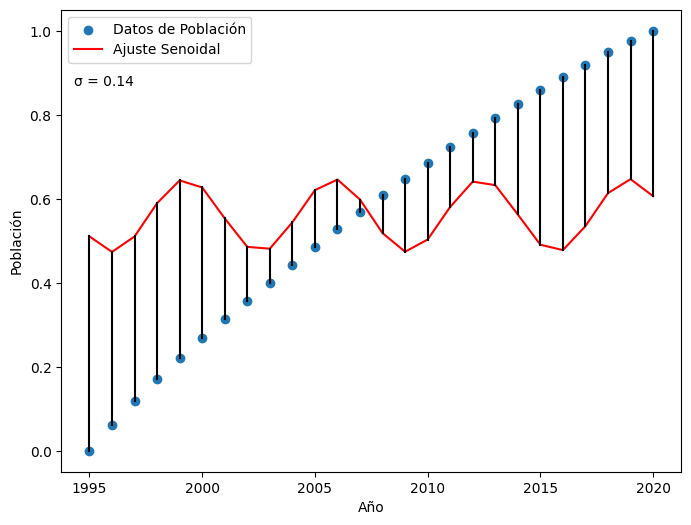

In [22]:
def sinosoidal_fit(x, A, omega, phi, offset):
    return A * np.sin(omega*x + phi) + offset

params, covariance = curve_fit(sinosoidal_fit, x, y)

A, omega, phi, offset= params
y_fit = sinosoidal_fit(x, A, omega, phi, offset)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Población')
plt.plot(x, y_fit, color='red', label='Ajuste Senoidal')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Población')
plt.legend()
plt.show()

# Ajuste de curva de Presión

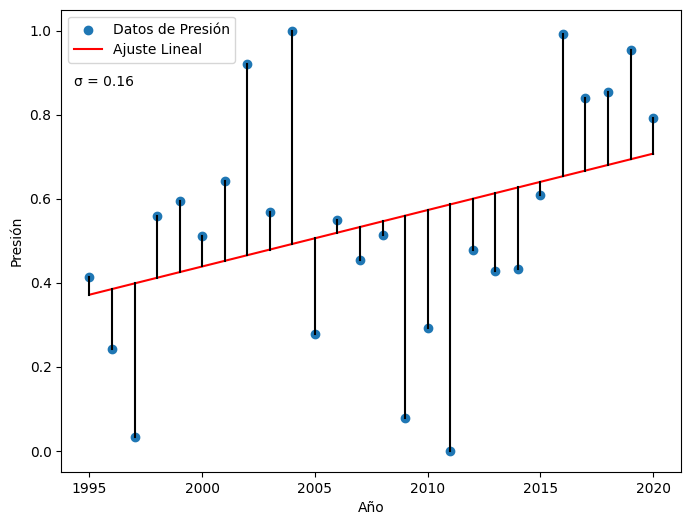

In [23]:
def linear_fit(x, a, b):
    return a * x + b

# Ajuste de la temperatura en función del año
x = df['ano']
y = df['presion_norm']

params, covariance = curve_fit(linear_fit, x, y)

a, b = params
y_fit = linear_fit(x, a, b)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Presión')
plt.plot(x, y_fit, color='red', label='Ajuste Lineal')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Presión')
plt.legend()
plt.show()

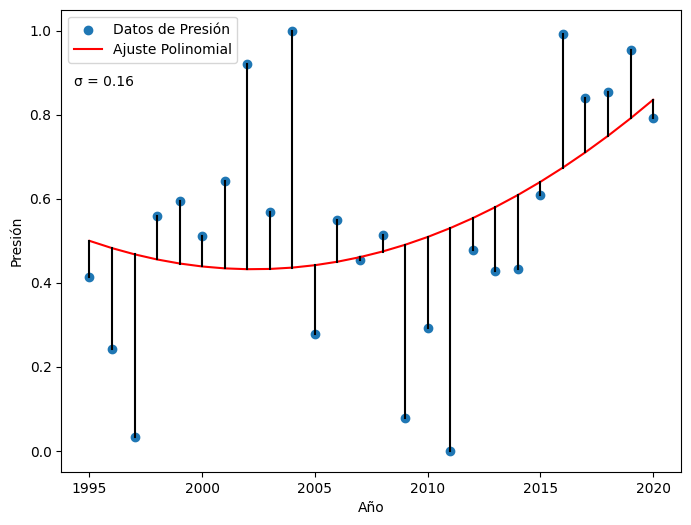

In [24]:
def polynomial_fit(x, a, b, c):
    return a * x**2 + b * x + c

params, covariance = curve_fit(polynomial_fit, x, y)

a, b, c = params
y_fit = polynomial_fit(x, a, b, c)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Presión')
plt.plot(x, y_fit, color='red', label='Ajuste Polinomial')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Presión')
plt.legend()
plt.show()

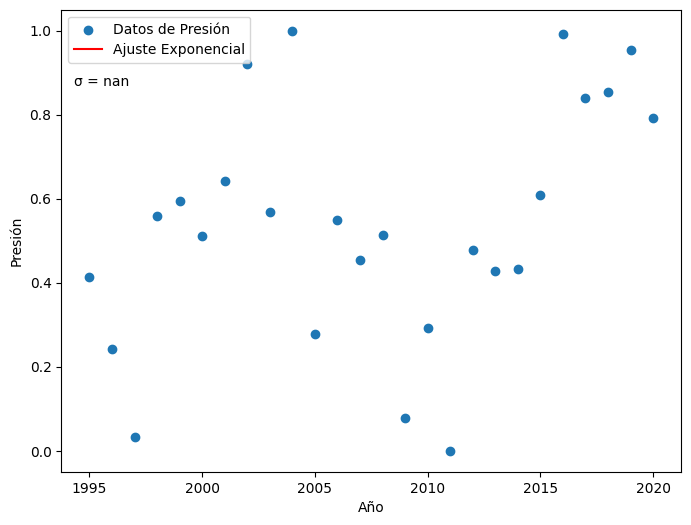

In [25]:
def exponential_fit(x, a, b, c):
    return a * np.exp(b*x)+c

params, covariance = curve_fit(exponential_fit, x, y)

a, b, c = params
y_fit = exponential_fit(x, a, b, c)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Presión')
plt.plot(x, y_fit, color='red', label='Ajuste Exponencial')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Presión')
plt.legend()
plt.show()

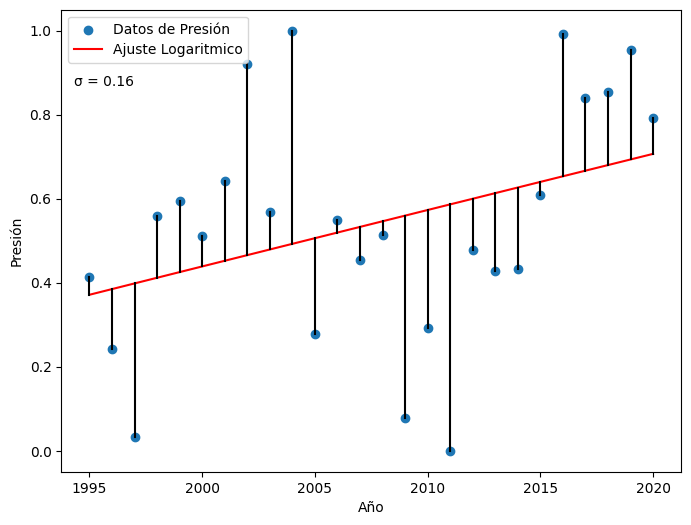

In [26]:
def logarithmic_fit(x, a, b):
    return a * np.log(x)+b

params, covariance = curve_fit(logarithmic_fit, x, y)

a, b= params
y_fit = logarithmic_fit(x, a, b)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Presión')
plt.plot(x, y_fit, color='red', label='Ajuste Logaritmico')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Presión')
plt.legend()
plt.show()

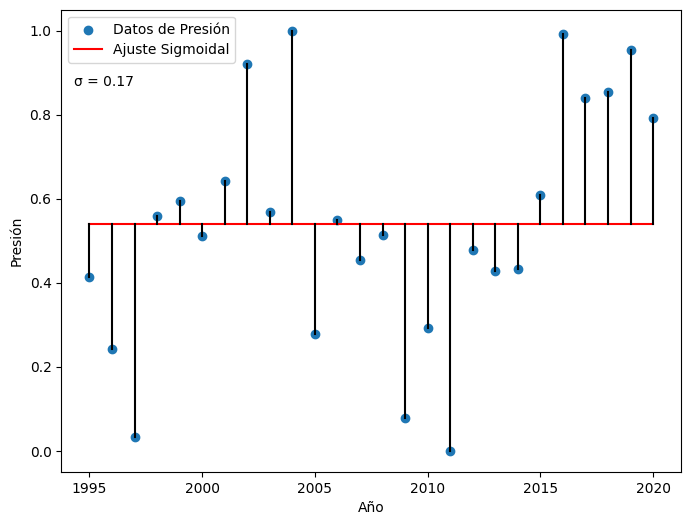

In [27]:
def sigmoid_fit(x, a, b, c, d):
    return a / ( 1 + np.exp(-b * (x - c)) ) + d

params, covariance = curve_fit(sigmoid_fit, x, y)

a, b, c, d= params
y_fit = sigmoid_fit(x, a, b, c, d)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Presión')
plt.plot(x, y_fit, color='red', label='Ajuste Sigmoidal')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Presión')
plt.legend()
plt.show()

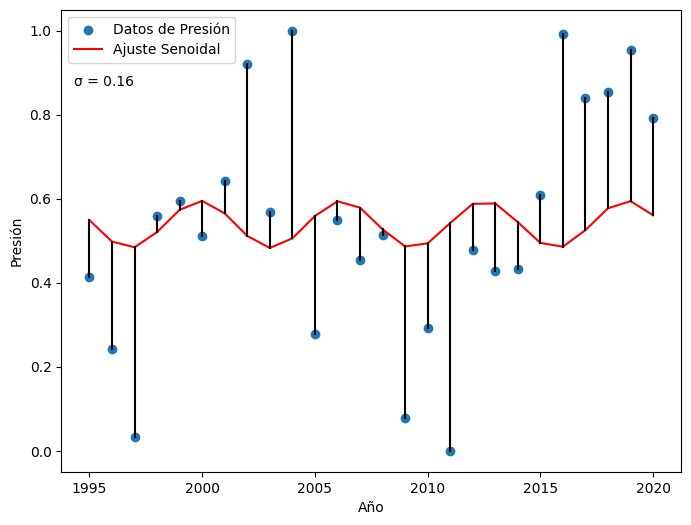

In [28]:
def sinosoidal_fit(x, A, omega, phi, offset):
    return A * np.sin(omega*x + phi) + offset

params, covariance = curve_fit(sinosoidal_fit, x, y)

A, omega, phi, offset= params
y_fit = sinosoidal_fit(x, A, omega, phi, offset)

# Calculando los errores
errors = np.abs(y - y_fit)  # Diferencia absoluta entre los valores experimentales y los valores ajustados

# Calculando la desviación estándar de los errores
std_dev_errors = np.std(errors)

# Visualizar el ajuste
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Datos de Presión')
plt.plot(x, y_fit, color='red', label='Ajuste Senoidal')

# Dibujar barras de error manualmente
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_fit[i]], color='black')

# Agregar la desviación estándar de los errores como texto en la gráfica
plt.text(0.02, 0.86, f'σ = {std_dev_errors:.2f}', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

plt.xlabel('Año')
plt.ylabel('Presión')
plt.legend()
plt.show()

# Correlación de Témperatura vs Población

In [29]:
df.columns.values

array(['ano', 'presion_norm', 'poblacion_norm', 'temperatura_norm'],
      dtype=object)

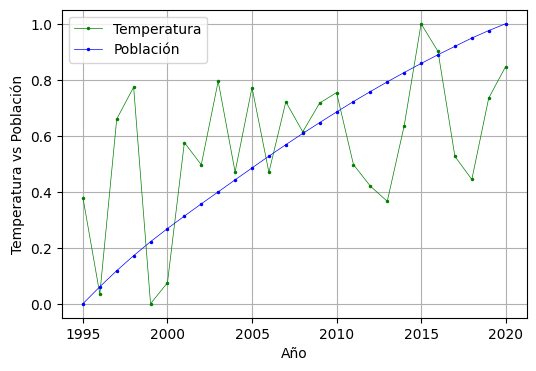

Correlación de Spearman: 0.3688888888888889
Correlación de Pearson: 0.46347185193097035
Correlación de Kendall: 0.23692307692307696


In [32]:
plt.figure(figsize=(6, 4))
plt.plot(df['ano'], df['temperatura_norm'], marker= 'o', markersize=1.5,
         linewidth=0.5, linestyle='solid', color='green', label='Temperatura')
plt.plot(df['ano'], df['poblacion_norm'], marker= 'o', markersize=1.5,
         linewidth=0.5, linestyle='solid', color='blue', label='Población')
plt.xlabel('Año')
plt.ylabel('Temperatura vs Población')
plt.grid()
plt.legend()
plt.show()

# Calcular la correlación de Spearman
spearman_corr = df['temperatura_norm'].corr(df['poblacion_norm'], method='spearman')
# Calcular la correlación de Pearson
correlation = df['temperatura_norm'].corr(df['poblacion_norm'])
# Calcular la correlación de Kendall
kendall_corr, _ = kendalltau(df['temperatura_norm'], df['poblacion_norm'])

print(f"Correlación de Spearman: {spearman_corr}")
print(f"Correlación de Pearson: {correlation}")
print(f"Correlación de Kendall: {kendall_corr}")



# Correlación de Temperatura vs Presión

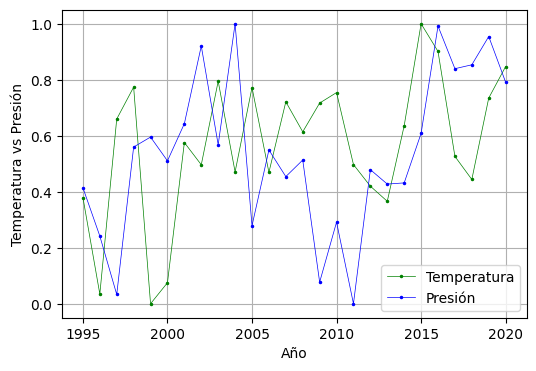

Correlación de Spearman: 0.15555555555555553
Correlación de Pearson: 0.11275888152481041
Correlación de Kendall: 0.11384615384615385


In [33]:
plt.figure(figsize=(6, 4))
plt.plot(df['ano'], df['temperatura_norm'], marker= 'o', markersize=1.5,
         linewidth=0.5, linestyle='solid', color='green', label='Temperatura')
plt.plot(df['ano'], df['presion_norm'], marker= 'o', markersize=1.5,
         linewidth=0.5, linestyle='solid', color='blue', label='Presión')
plt.xlabel('Año')
plt.ylabel('Temperatura vs Presión')
plt.grid()
plt.legend()
plt.show()

# Calcular la correlación de Spearman
spearman_corr = df['temperatura_norm'].corr(df['presion_norm'], method='spearman')
# Calcular la correlación de Pearson
correlation = df['temperatura_norm'].corr(df['presion_norm'])
# Calcular la correlación de Kendall
kendall_corr, _ = kendalltau(df['temperatura_norm'], df['presion_norm'])

print(f"Correlación de Spearman: {spearman_corr}")
print(f"Correlación de Pearson: {correlation}")
print(f"Correlación de Kendall: {kendall_corr}")